<a href="https://colab.research.google.com/github/mainarel/-Numerical_methods/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

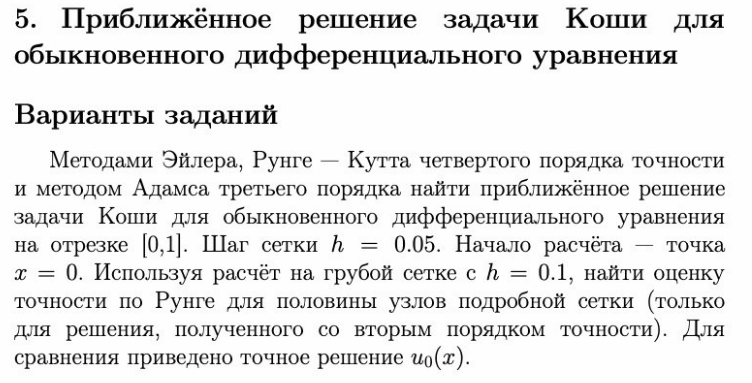

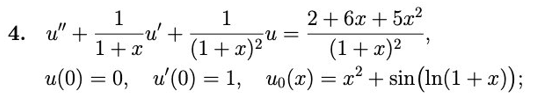

Нормальная форма:
* u1 = u' 
* u1' = -u1* 1/(1+x) - u* 1/(1+x)^2 + (2+6x+5x**2)/(1+x)^2

In [155]:
import numpy as np
from matplotlib import pyplot as plt


def odu(x, u0_u10):
  return (- u0_u10[1][0] ) / (1+x) - u0_u10[0][0] / ((1+x)**2) + (2 + 6*x + 5*(x**2))/((1+x)**2)
  

def solution(x):
  return x**2 + np.sin(np.log(1+x))

u0_u10 = np.array([[0], [1]])
a, b = 0, 1
h_loc = 0.05
xrange = np.arange(a,b+h_loc,h_loc)
yrange = solution(xrange)


# Метод Эйлера:

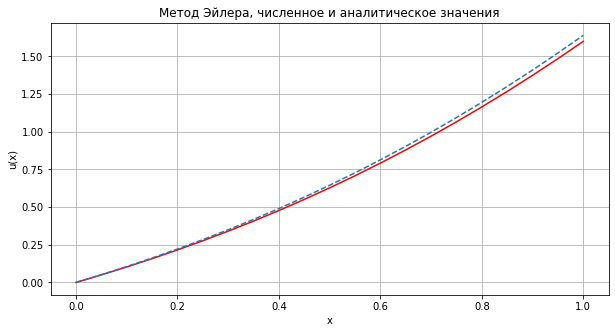

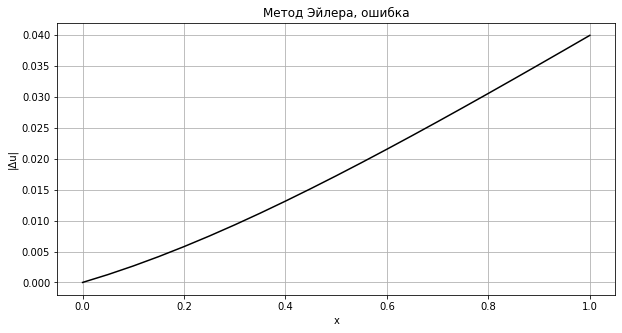

In [156]:
def euler(odu, xn, u0_u10):
    yn = []
    yn.append(u0_u10[0][0])
    h = xn[3]-xn[2]
    for i in range(1,len(xn)):
      u0_u10 = u0_u10 + h * np.array( [[ u0_u10[1][0] ], [ odu(np.arange(a,b+h,h)[i-1],u0_u10) ]] )
      yn.append(u0_u10[0][0])
    return yn

plt.figure(figsize=(10,5))
plt.title("Метод Эйлера, численное и аналитическое значения")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid()
plt.plot(xrange, euler(odu, xrange, u0_u10), color='red')
plt.plot(xrange, yrange, linestyle="--")


plt.figure(figsize=(10,5))
plt.title("Метод Эйлера, ошибка")
plt.xlabel("x")
plt.ylabel("|Δu|")
plt.grid()
plt.plot(xrange, [abs(euler(odu, xrange, u0_u10)[i] - yrange[i])  for i in range (len(xrange))] , color='black')


# Метод Рунге-Кутты_4:

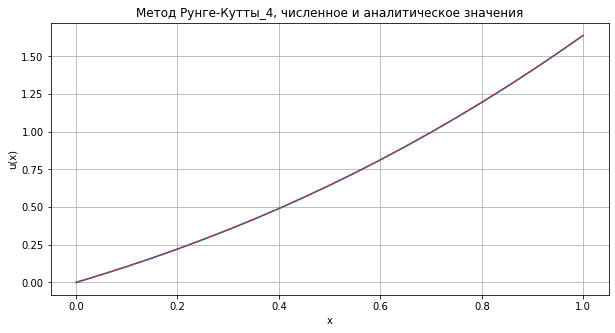

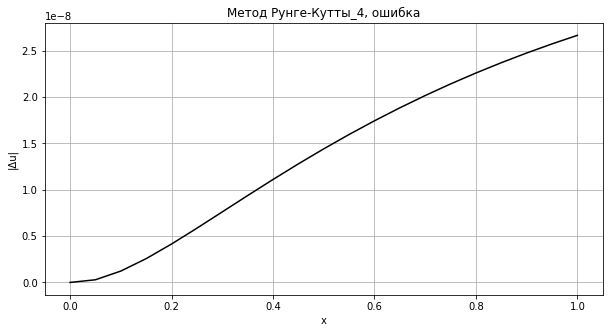

In [157]:
def runge_cutta(odu, xn, u0_u10):
    h = xn[3]-xn[2]
    u = np.zeros(len(xn))
    u1 = np.zeros(len(xn)) 
    u[0] = u0_u10[0][0]
    u1[0] = u0_u10[1][0]

    for i in range(1,len(xn)):
      K1 = odu( xn[i-1], np.array([[u[i-1]], [u1[i-1]]]) )
      q1 = u1[i - 1]

      K2 = odu( xn[i-1] + h/2, np.array([[u[i-1] + h/2*q1], [u1[i-1] + h/2*K1]]) )
      q2 = u1[i - 1] + h/2*K1

      K3 = odu( xn[i-1] + h/2, np.array([[u[i-1] + h/2*q2], [u1[i-1] + h/2*K2]]) )
      q3 = u1[i - 1] + h/2*K2

      K4 = odu( xn[i-1] + h, np.array([[u[i-1] + h*q3], [u1[i-1] + h*K3]]) )
      q4 = u1[i - 1] + h*K3

      u1[i] = u1[i-1] + (h/6) * (K1 + 2*K2 + 2*K3 + K4)
      u[i] = u[i-1] + (h/6) * (q1 + 2*q2 + 2*q3 + q4)

    return u, u1

plt.figure(figsize=(10,5))
plt.title("Метод Рунге-Кутты_4, численное и аналитическое значения")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid()
plt.plot(xrange, runge_cutta(odu, xrange, u0_u10)[0], color='red')
plt.plot(xrange, yrange, linestyle="--")


plt.figure(figsize=(10,5))
plt.title("Метод Рунге-Кутты_4, ошибка")
plt.xlabel("x")
plt.ylabel("|Δu|")
plt.grid()
plt.plot(xrange, [abs(runge_cutta(odu, xrange, u0_u10)[0][i] - yrange[i])  for i in range (len(xrange))] , color='black')

# Метод Адамса_3:

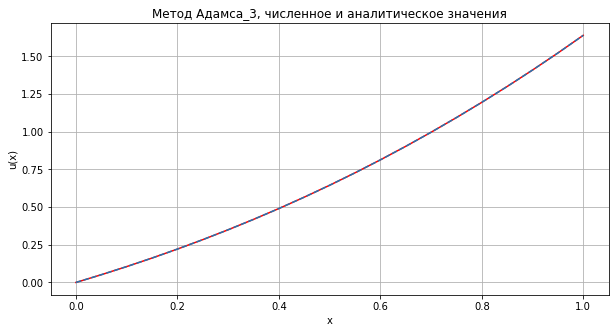

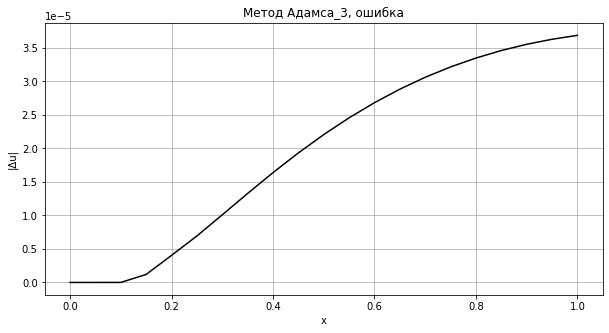

In [158]:
def adams_3(odu, xn, u0_u10): 

    h = xn[3]-xn[2]
    u1 = np.zeros(len(xn))
    u = np.zeros(len(xn))
    u[0:3] = runge_cutta(odu, xn[:4], u0_u10)[0][:3]
    u1[0:3] = runge_cutta(odu, xn[:4], u0_u10)[1][:3]

    for i in range(3,len(xn)):
        K1 = odu( xn[i-1], np.array([[u[i-1]], [u1[i-1]]]) )
        q1 = u1[i - 1] 

        K2 = odu( xn[i-2], np.array([[u[i-2]], [u1[i-2]]]) )
        q2 = u1[i - 2] 

        K3 = odu( xn[i-3], np.array([[u[i-3]], [u1[i-3]]]) )
        q3 = u1[i - 3] 

        u1[i] = u1[i - 1] + h*(23/12*K1 - 4/3*K2 + 5/12*K3)
        u[i] = u[i - 1] + h*(23/12*q1 - 4/3*q2 + 5/12*q3)

    return u

plt.figure(figsize=(10,5))
plt.title("Метод Адамса_3, численное и аналитическое значения")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid()
plt.plot(xrange, adams_3(odu, xrange, u0_u10), color='red')
plt.plot(xrange, yrange, linestyle="--")


plt.figure(figsize=(10,5))
plt.title("Метод Адамса_3, ошибка")
plt.xlabel("x")
plt.ylabel("|Δu|")
plt.grid()
plt.plot(xrange, [abs(adams_3(odu, xrange, u0_u10)[i] - yrange[i])  for i in range (len(xrange))] , color='black')

# Поправка Рунге для метода Эйлера:

green - с поправкой
blue - реальное значение
red - без поправки


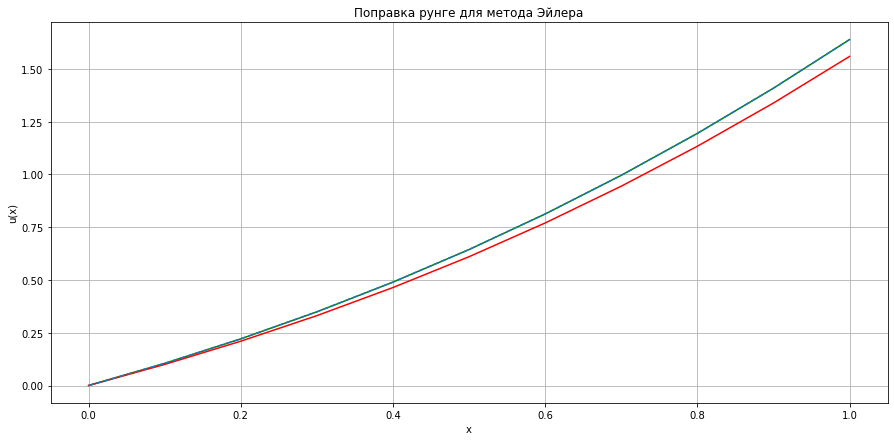

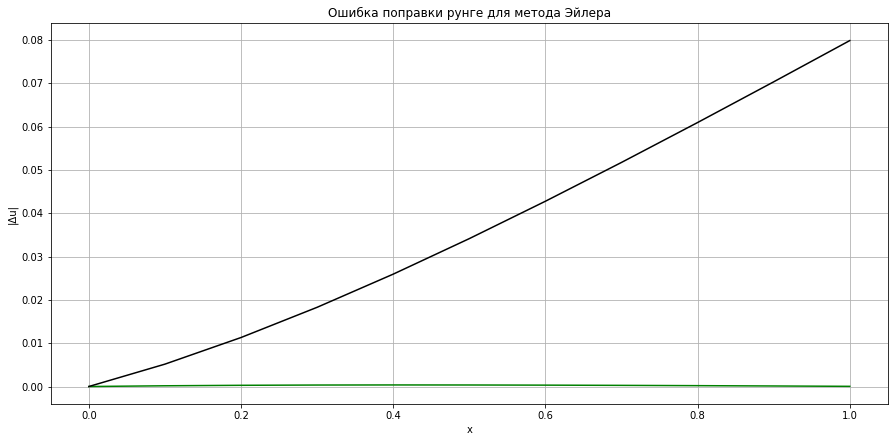

In [159]:
def runge_euler(odu, xn1, u0_u10):
    p = 1 
    yn = []
    h = xn1[3]-xn1[2]
    xn2 = np.arange(a, b+(h/2), h/2)
    
    y_euler_1 = euler(odu, xn1, u0_u10)
    y_euler_2 = euler(odu, xn2, u0_u10)[::2]

    for i in range(len(y_euler_1)):
        yn.append(y_euler_2[i] + (y_euler_2[i] - y_euler_1[i])/(2**p - 1))  
    return yn

hr = 0.1
xranger = np.arange(a, b+hr, hr)
yranger = solution(xranger)

plt.figure(figsize=(15,7))
plt.title("Поправка рунге для метода Эйлера")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid()
plt.plot(xranger, runge_euler(odu, xranger, u0_u10), color='green')
plt.plot(xranger, euler(odu, xranger, u0_u10), color='red')
plt.plot(xranger, yranger, linestyle="--")

print('green - с поправкой\nblue - реальное значение\nred - без поправки')

plt.figure(figsize=(15,7))
plt.title("Ошибка поправки рунге для метода Эйлера")
plt.xlabel("x")
plt.ylabel("|Δu|")
plt.grid()
plt.plot(xranger, [abs(runge_euler(odu, xranger, u0_u10)[i] - yranger[i])  for i in range (len(xranger))], color='green')
plt.plot(xranger, [abs(euler(odu, xranger, u0_u10)[i] - yranger[i])  for i in range (len(xranger))] , color='black')




1.000135661891283
3.8679642537973353
2.897083248464375


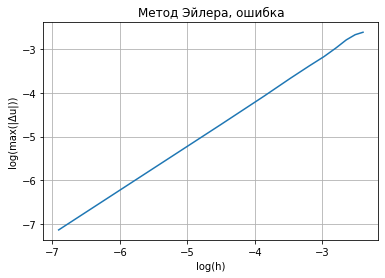

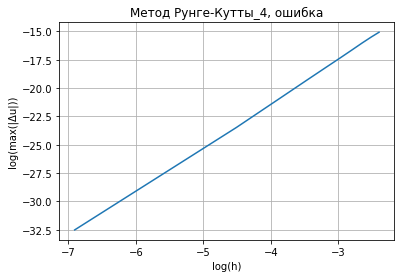

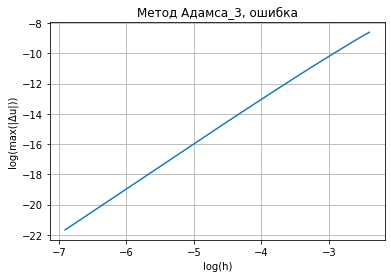

In [160]:
#for error_graphs
import math


hmin = 0.001
hmax = 0.1
hstep = 0.01
hrange = np.arange(hmin,hmax,hstep)

euler_error = []
adams_3_error = []
runge_cutta_4_error = []
runge_euler_error = []
h_log = []

def difference(true, result):
    dfr = [abs(true[i] - result[i]) for i in range(len(true))]
    return math.log(max(dfr))

for i in range(len(hrange)):
    hi = hrange[i]
    h_log.append(math.log(hi))
    xrangeh = np.arange(a,b+hi,hi)
    yrangeh = solution (xrangeh)
    euler_error.append( difference( euler(odu, xrangeh, u0_u10),yrangeh))
    runge_cutta_4_error.append (difference(( runge_cutta(odu, xrangeh, u0_u10)[0]) ,yrangeh))
    adams_3_error.append (difference(( adams_3(odu, xrangeh, u0_u10)) ,yrangeh))
    #runge_euler_error.append(difference( runge_euler(odu, xrangeh, u0_u10) ,yrangeh) )



plt.figure(1)
plt.title("Метод Эйлера, ошибка")
plt.xlabel("log(h)")
plt.ylabel("log(max(|Δu|))")
plt.grid()
plt.plot(h_log,euler_error )
gradient = (euler_error[-1] - euler_error[0]) / (h_log[-1] - h_log[0])
print (gradient)

plt.figure(2)
plt.title("Метод Рунге-Кутты_4, ошибка")
plt.xlabel("log(h)")
plt.ylabel("log(max(|Δu|))")
plt.grid()
plt.plot(h_log,runge_cutta_4_error )
gradient = (runge_cutta_4_error[-1] - runge_cutta_4_error[0]) / (h_log[-1] - h_log[0])
print (gradient)

plt.figure(3)
plt.title("Метод Адамса_3, ошибка")
plt.xlabel("log(h)")
plt.ylabel("log(max(|Δu|))")
plt.grid()
plt.plot(h_log,adams_3_error )
gradient = (adams_3_error[-1] - adams_3_error[0]) / (h_log[-1] - h_log[0])
print (gradient)



 
  
